In [307]:
# Get thinkdsp.py
import os

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve
    urlretrieve("https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py", "thinkdsp.py")

### Упражнение 1.2
Работа с образцом звука — звук школьного звонка.

In [308]:
from thinkdsp import read_wave

wave = read_wave('resources/Sounds/task2_school_rings.wav')
wave.normalize()
wave.make_audio()

Вот так выглядит график всей записи

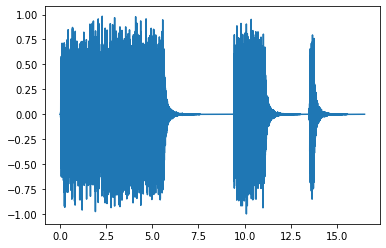

In [309]:
wave.plot()

Выделим отрезок с постоянной высотой звука.

In [310]:
segment = wave.segment(start=5.0, duration=0.3)
segment.make_audio()

График отрезка записи выглядит следующим образом.

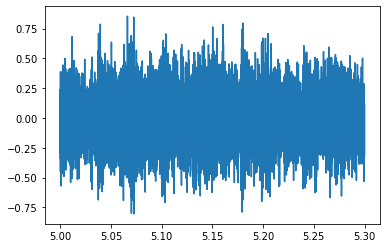

In [311]:
segment.plot()

Выведем ещё более короткий сегмент, чтобы увидеть его форму.

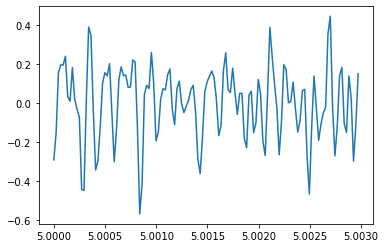

In [312]:
segment.segment(5.0, 0.003).plot()

Теперь выведем спектр нашего сегмента

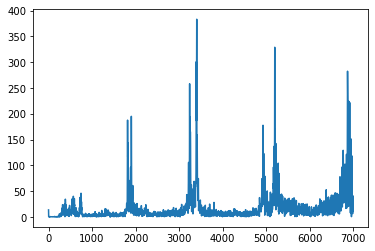

In [313]:
spectrum = segment.make_spectrum()
spectrum.plot(7000)

Выведем основные и доминирующие частоты

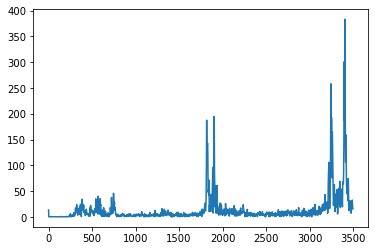

In [314]:
spectrum.plot(3500)

Теперь отфильтруем высокие частоты:

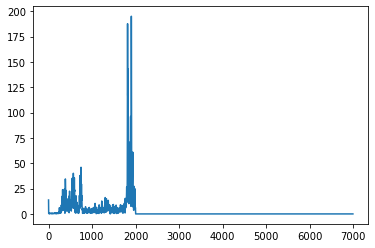

In [315]:
spectrum.low_pass(2000)
spectrum.plot(7000)
spectrum.make_wave().make_audio()

Фильтрация низких частот:

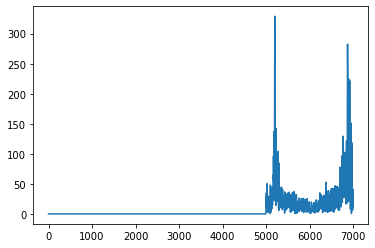

In [316]:
spectrum = segment.make_spectrum()
spectrum.high_pass(5000)
spectrum.plot(7000)
spectrum.make_wave().make_audio()

Выборочная фильтрация

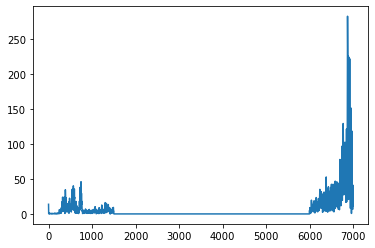

In [317]:
spectrum = segment.make_spectrum()
spectrum.band_stop(1500, 6000)
spectrum.plot(7000)
spectrum.make_wave().make_audio()

### Упражнение 1.3
Суммирование `SinSignal` и `CosSignal`.

Создание сигнала и его вывод

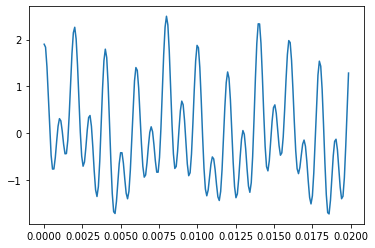

In [318]:
from thinkdsp import SinSignal, CosSignal

sin1 = SinSignal(freq=150, amp=0.5)
sin2 = SinSignal(freq=800, amp=0.2)
cos1 = CosSignal(freq=500, amp=0.9)
cos2 = CosSignal(freq=1000, amp=1.0)

signal = sin1 + cos1 + sin2 + cos2
signal.plot()

Преобразование в звук

In [319]:
wave = signal.make_wave(duration=1)
wave.make_audio()

Создание спектра

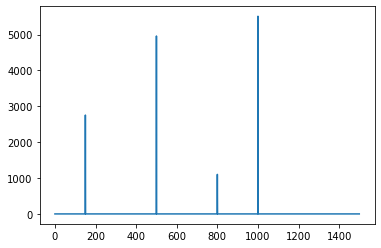

In [320]:
spectrum = wave.make_spectrum()
spectrum.plot(1500)

Прибавление ещё 2 сигналов

In [321]:
sin3 = SinSignal(freq=364, amp=0.8)
cos3 = CosSignal(freq=728, amp=0.7)

signal2 = signal + sin3 + cos3
signal2.make_wave(duration=1).make_audio()

### Упражнение 1.4
Создание функции `stretch`.

Функция

In [322]:
def stretch(wave_stretch, factor):
    wave_stretch.ts /= factor
    wave_stretch.framerate *= factor

Тестирование

Звук до обработки

In [323]:
wave1 = read_wave('resources/Sounds/task2_school_rings.wav')
wave2 = wave1
wave1.make_audio()

Замедление

In [324]:
stretch(wave1, 0.3)
wave1.make_audio()

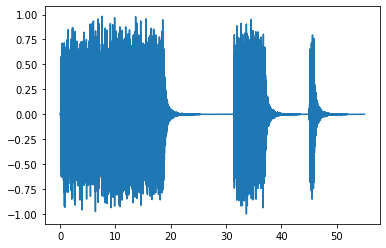

In [325]:
wave1.plot()

Ускорение

In [326]:
stretch(wave2, 5.0)
wave2.make_audio()

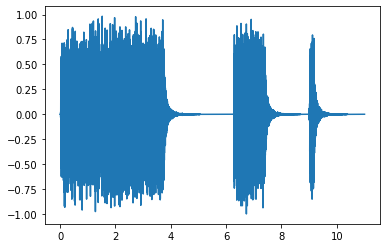

In [327]:
wave2.plot()